<a href="https://colab.research.google.com/github/rahiakela/opencv-projects-and-guide/blob/main/mastering-opencv4-with-python/5-image-processing-techniques/2_geometric_image_transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Geometric transformations of images

We will look at some examples the of scaling, translation, rotation, affine
transformation, perspective transform, and cropping of images. The two key functions to perform these geometric transformations are `cv2.warpAffine()` and `cv2.warpPerspective()`.

- `cv2.warpPerspective()` transforms the source image
by using the following 2 x 3 M transformation matrix
- `cv2.warpPerspective()` transforms the source image using the following 3
x 3 transformation matrix


## Setup

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
%%shell

wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/5-image-processing-techniques/images/lena_image.png

In [3]:
def show_with_matplotlib(color_img, title):
  """Shows an image using matplotlib capabilities"""

  # Convert BGR image to RGB
  img_RGB = color_img[:, :, ::-1]

  plt.imshow(img_RGB)
  plt.title(title)
  plt.show()

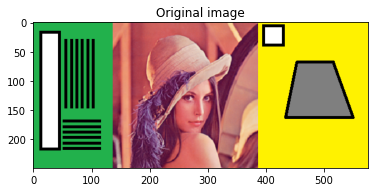

In [4]:
# Load the original image
image = cv2.imread("lena_image.png")

show_with_matplotlib(image, "Original image")

## Scaling an image

When scaling an image, you can call `cv2.resize()` with a specific size, and the scaling factors (`fx` and `fy`) will be calculated based on the provided size.

In [5]:
# 1. Scaling or resizing
dst_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

On the other hand, you can provide both the fx and fy values. For example, if you want to shrink the image by a factor of 2.

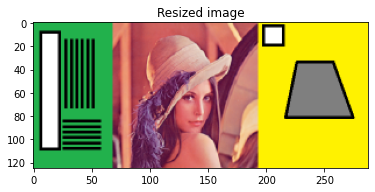

In [6]:
# Get the height and width of the image
height, width = image.shape[:2]

# You can resize also the image specifying the new size
dst_image_2 = cv2.resize(image, (width * 2, height * 2), interpolation=cv2.INTER_LINEAR)

# We see the two resized images
show_with_matplotlib(dst_image, "Resized image")

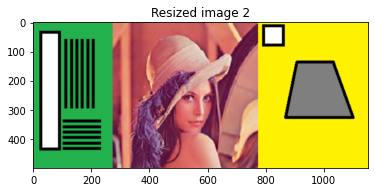

In [7]:
show_with_matplotlib(dst_image_2, "Resized image 2")

If you want to enlarge the image, the best approach is to use
the `cv2.INTER_CUBIC` interpolation method (a time-consuming interpolation method) or `cv2.INTER_LINEAR`. 

If you want to shrink the image, the general approach is to use `cv2.INTER_LINEAR`.

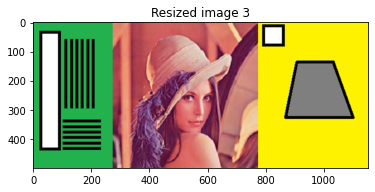

In [8]:
# You can resize also the image specifying the new size
dst_image_3 = cv2.resize(image, (width * 2, height * 2), interpolation=cv2.INTER_CUBIC)

# We see the two resized images
show_with_matplotlib(dst_image_3, "Resized image 3")

## Translating an image

In order to translate an object, you need to create the 2 x 3 transformation matrix by using the NumPy array with float values providing the translation in both the x and y directions in pixels.

```python
M = np.float32([[1, 0, x], [0, 1, y]])
```

This gives the following M transformation matrix:

$$ M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$$

For example, if we want to translate an image with 200 pixels in the x direction and 30 pixels in the y direction.

In [9]:
# 2. Translation
M = np.float32([
   [1, 0, 200],
   [0, 1, 30]             
])

Once this matrix has been created, the cv2.warpAffine() function is called.

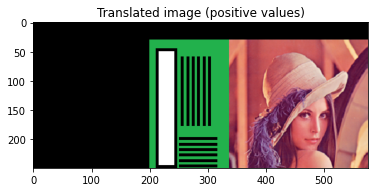

In [10]:
dst_image = cv2.warpAffine(image, M, (width, height))

show_with_matplotlib(dst_image, 'Translated image (positive values)')

The `cv2.warpAffine()` function transforms the source image using the M matrix
provided. The third (width, height) argument establishes the size of the output image.

Note that the translation can be also negative.

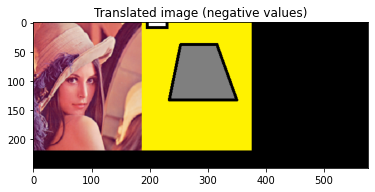

In [12]:
M = np.float32([
   [1, 0, -200],
   [0, 1, -30]             
])

dst_image = cv2.warpAffine(image, M, (width, height))

show_with_matplotlib(dst_image, 'Translated image (negative values)')

## Rotating an image